Please copy the notebook to your drive and write your code in it.

# New section

Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10
from statistics import mean, stdev 
from scipy.stats import iqr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn import metrics



In [5]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Dataset from csv file

In [6]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df= pd.read_csv('/content/drive/My Drive/Iris.csv')

print(df.dtypes)
df

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Preview dataset

Declare feature vector and target variable

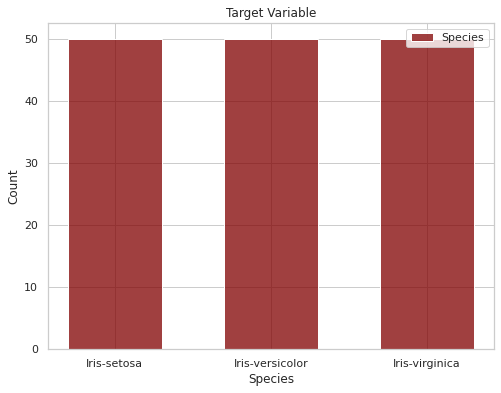

In [7]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.0, rc={"figure.figsize": [8, 6]})
sns.histplot(data = df, x="Species", color="maroon", label="Species", shrink=0.6)
plt.title("Target Variable")
plt.legend() 
plt.show()

<Figure size 2880x720 with 0 Axes>

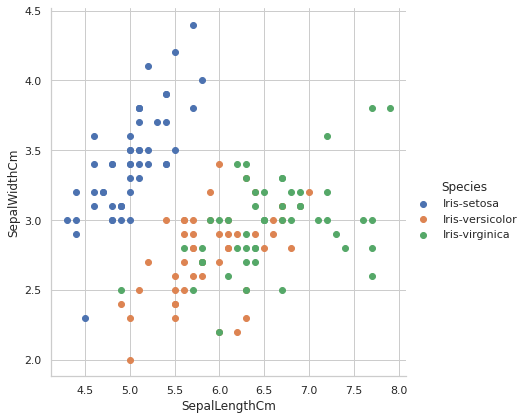

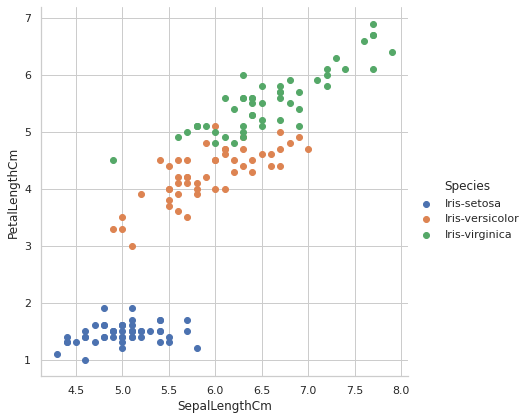

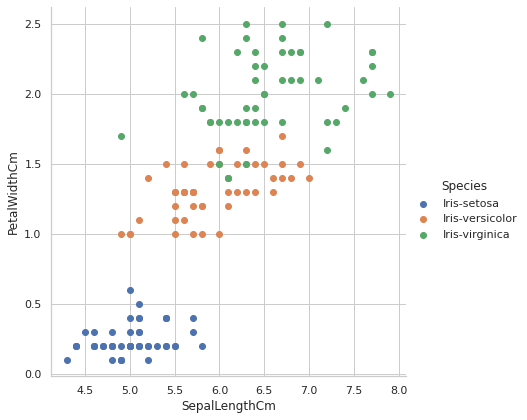

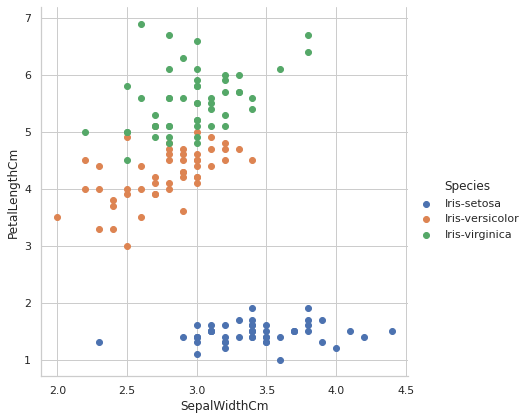

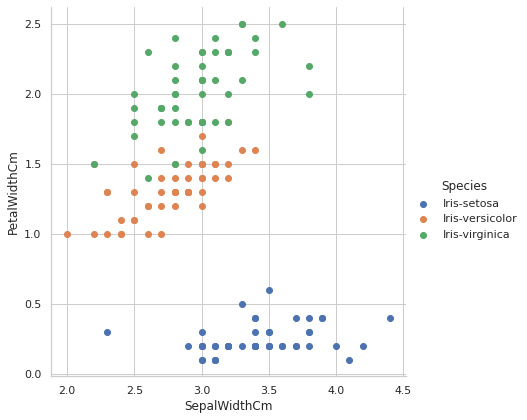

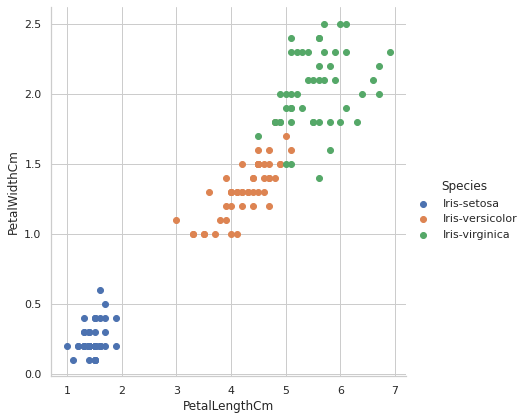

In [8]:
features = ['SepalLengthCm', 'SepalWidthCm',	'PetalLengthCm', 'PetalWidthCm']
fig, ax = plt.subplots(1, 0, figsize=(len(features)*10, 10))
for i in range(len(features)):
  for j in range(i+1,len(features)):
    sns.set_style("whitegrid")
    sns.FacetGrid(df, hue ="Species", height = 6).map(plt.scatter, features[i], features[j]).add_legend()
    plt.show()

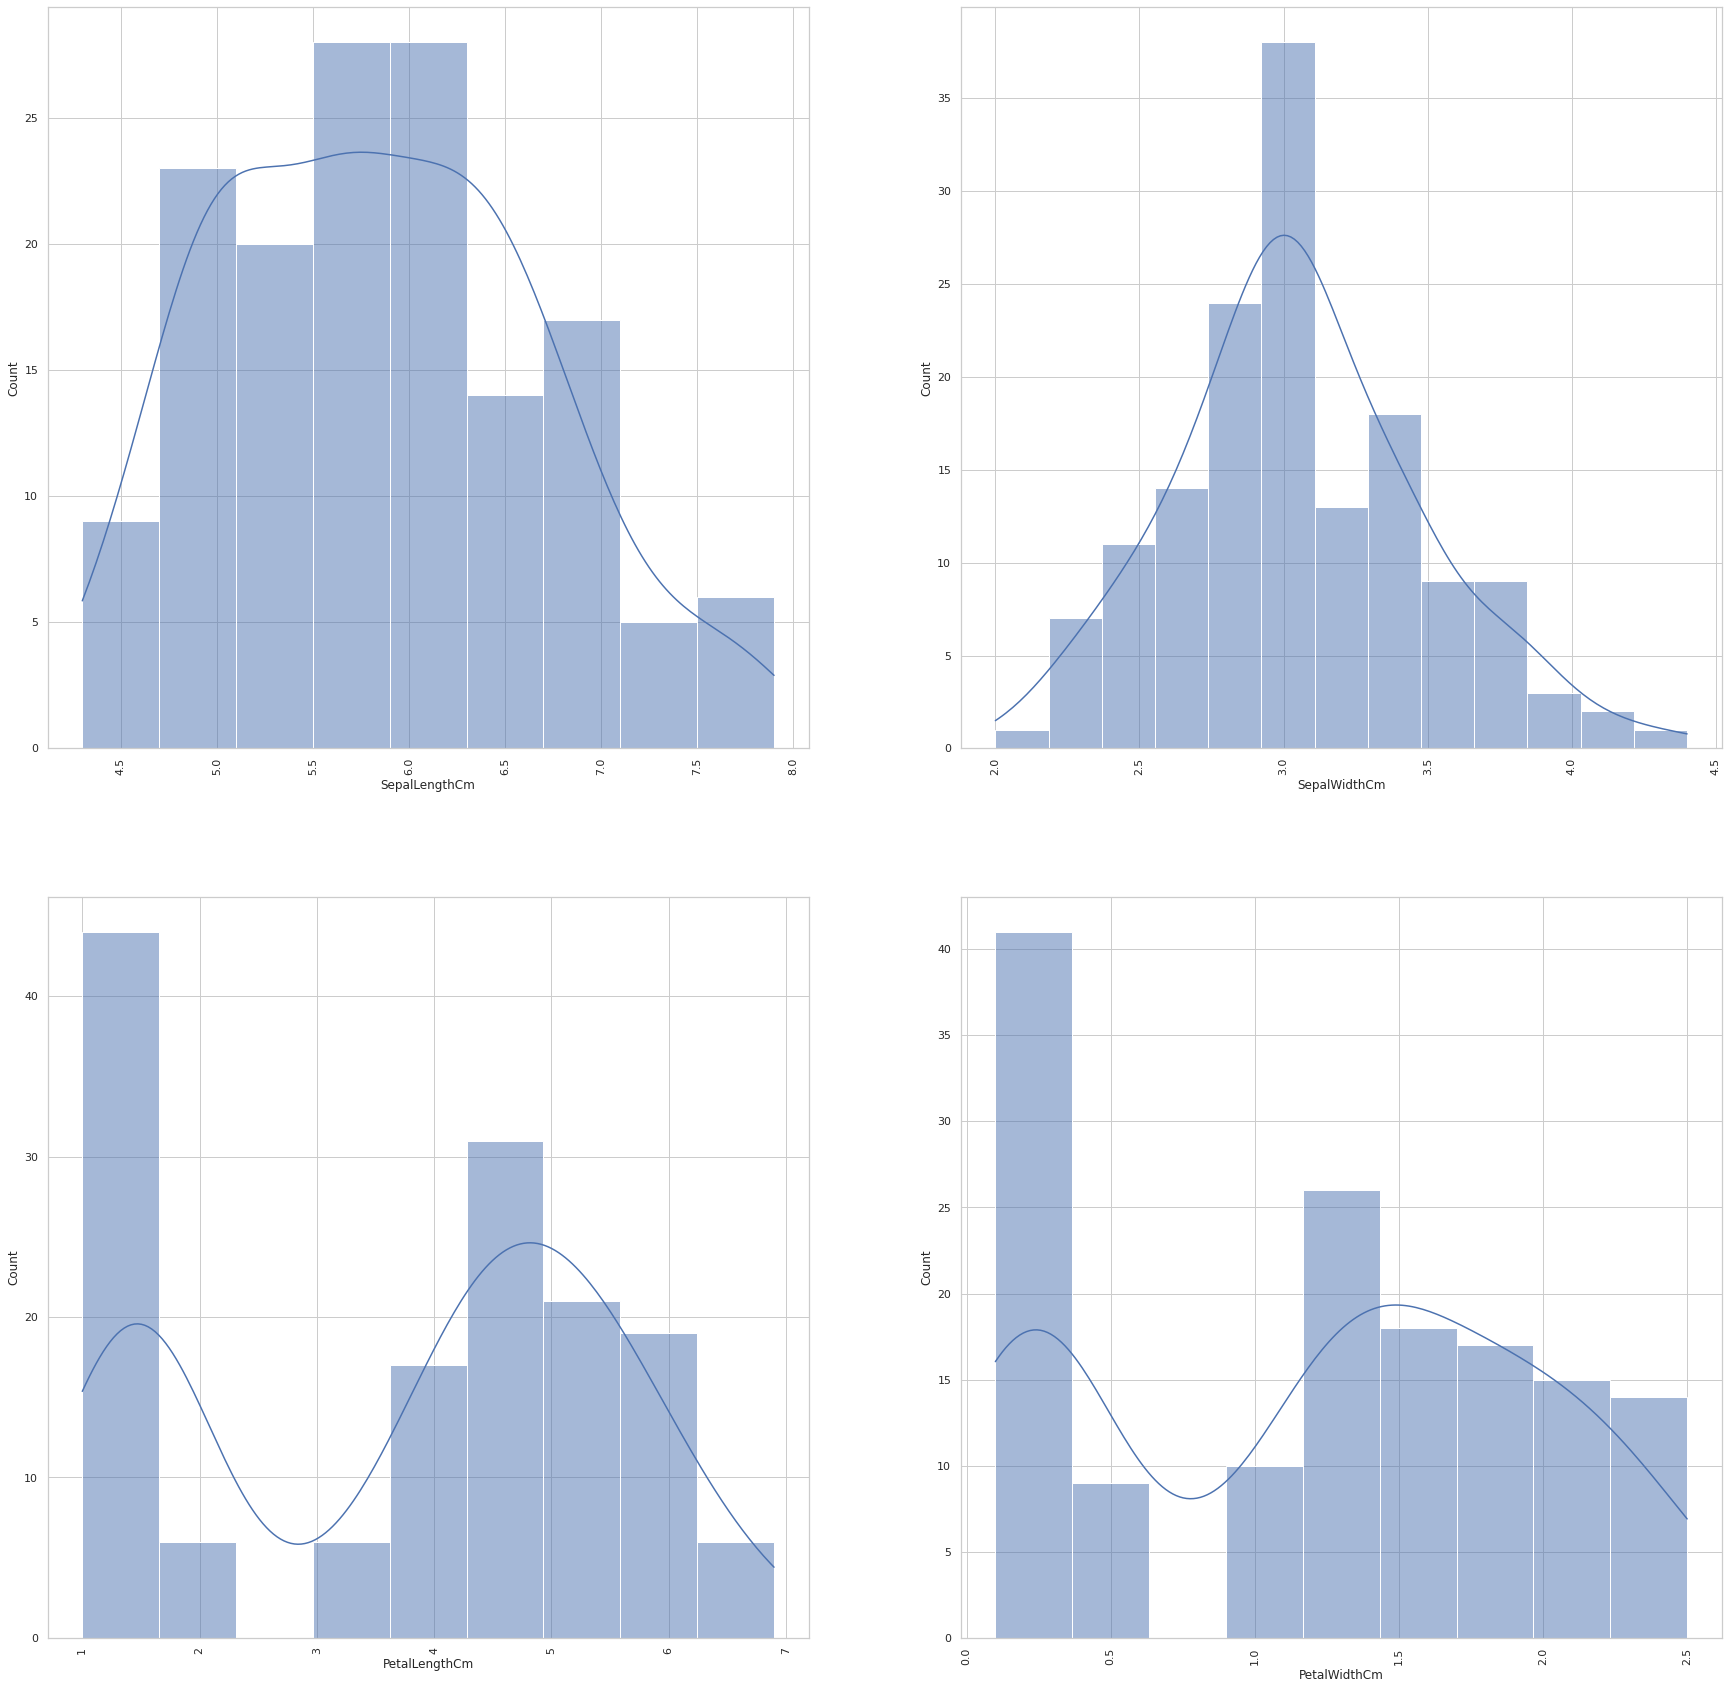

In [9]:
columns = ['SepalLengthCm', 	'SepalWidthCm',	'PetalLengthCm', 'PetalWidthCm']
fig, ax = plt.subplots(2, 2, figsize=(30, 30))
for x, y in zip(columns, ax.flatten()):
    sns.histplot(df[x], ax=y, kde=True)
    for label in y.get_xticklabels():
        label.set_rotation(90)

Replace categorical data with numbers

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

df['Species'] = Le.fit_transform(df['Species'])

In [11]:
X = df.drop(['Species','Id'], axis=1)
# X = df.drop(['Id'], axis=1)
Y = df['Species']

Split data into train and test sets

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=1,shuffle= True)
# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)

Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [13]:
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(max_depth=2)
dtc1 = DecisionTreeClassifier(max_depth=1)

Fit weak classifier

In [14]:
dtc.fit(X_train, Y_train)
dtc1.fit(X_train, Y_train)
cvs = cross_val_score(dtc,X,Y,cv=5)
pred = dtc.predict(X_test)
cvs1 = cross_val_score(dtc1,X,Y,cv=5)
pred1 = dtc1.predict(X_test)

Calculate the accuracy by the weak learner

In [15]:
accuracy =accuracy_score(Y_test, pred)
accuracy1 =accuracy_score(Y_test, pred1)
print("For max depth 2:")
print("cv score: ",cvs)
print("Mean: ",mean(cvs))
print("Accuracy: ",accuracy)

print("\nFor max depth 1:")
print("cv score: ",cvs1)
print("Mean: ",mean(cvs1))
print("Accuracy: ",accuracy1)

For max depth 2:
cv score:  [0.93333333 0.96666667 0.9        0.86666667 1.        ]
Mean:  0.9333333333333333
Accuracy:  0.9666666666666667

For max depth 1:
cv score:  [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
Mean:  0.6666666666666666
Accuracy:  0.5666666666666667


Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [16]:
# Create adaboost classifer object
ada_list=[]
for i in range(1,6):
  model=AdaBoostClassifier(base_estimator=dtc,n_estimators=i, learning_rate=1)
  ada_list.append(model)

ada_list1=[]
for i in range(1,6):
  model=AdaBoostClassifier(base_estimator=dtc1,n_estimators=i, learning_rate=1)
  ada_list1.append(model)

Plot the model performance

In [17]:
result = []
means = []
stdevs = []
def evaluate_model(model, X, Y):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
  scores = []
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  # fig, ax = plt.subplots()
  for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
      X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
      Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
      model.fit(X_train_fold, Y_train_fold) 
      scores.append(model.score(X_test_fold, Y_test_fold)*100)
  result.append(scores)
  print("\nScores:", scores)
  print("Mean: %.5f"%mean(scores), chr(37))
  means.append(mean(scores))
  print("Standard Deviation: %.5f"%stdev(scores))
  stdevs.append(stdev(scores))

In [18]:
print("For max-depth 2")
for i in range(0,5):
  evaluate_model(ada_list[i], X, Y)
  print("Accuracy: ",ada_list[i].score(X_test, Y_test)*100, chr(37))
print("\n\nFor max-depth 1")
for i in range(0,5):
  evaluate_model(ada_list1[i], X, Y)
  print("Accuracy: ",ada_list1[i].score(X_test, Y_test)*100, chr(37))
  # print(iqr(adaModels[i]))

For max-depth 2

Scores: [86.66666666666667, 100.0, 96.66666666666667, 93.33333333333333, 96.66666666666667]
Mean: 94.66667 %
Standard Deviation: 5.05525
Accuracy:  100.0 %

Scores: [86.66666666666667, 96.66666666666667, 93.33333333333333, 96.66666666666667, 100.0]
Mean: 94.66667 %
Standard Deviation: 5.05525
Accuracy:  96.66666666666667 %

Scores: [86.66666666666667, 96.66666666666667, 93.33333333333333, 93.33333333333333, 96.66666666666667]
Mean: 93.33333 %
Standard Deviation: 4.08248
Accuracy:  96.66666666666667 %

Scores: [86.66666666666667, 96.66666666666667, 93.33333333333333, 93.33333333333333, 96.66666666666667]
Mean: 93.33333 %
Standard Deviation: 4.08248
Accuracy:  96.66666666666667 %

Scores: [93.33333333333333, 96.66666666666667, 93.33333333333333, 93.33333333333333, 96.66666666666667]
Mean: 94.66667 %
Standard Deviation: 1.82574
Accuracy:  96.66666666666667 %


For max-depth 1

Scores: [66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666

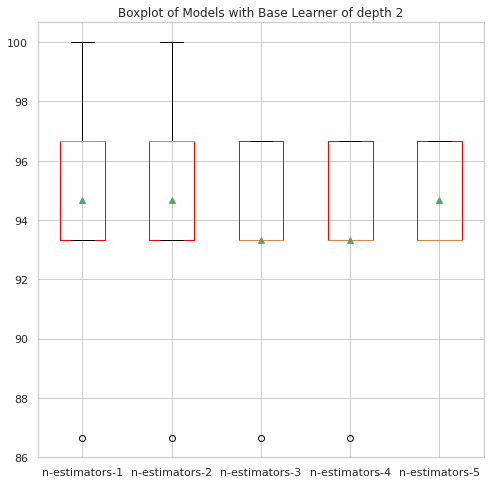

In [19]:
plt.rcParams['figure.figsize']= 8,8
labels_name = ['n-estimators-1', 'n-estimators-2','n-estimators-3', 'n-estimators-4','n-estimators-5']
plt.boxplot(result[0:5], boxprops=dict(color='red'), showmeans=True, labels=labels_name)
plt.title('Boxplot of Models with Base Learner of depth 2');
plt.show()

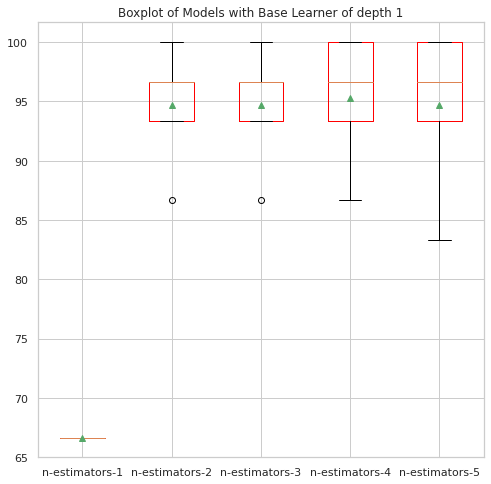

In [20]:
plt.rcParams['figure.figsize']= 8,8
labels_name = ['n-estimators-1', 'n-estimators-2','n-estimators-3', 'n-estimators-4','n-estimators-5']
plt.boxplot(result[5:10], boxprops=dict(color='red'), showmeans=True, labels=labels_name)
plt.title('Boxplot of Models with Base Learner of depth 1');
plt.show()

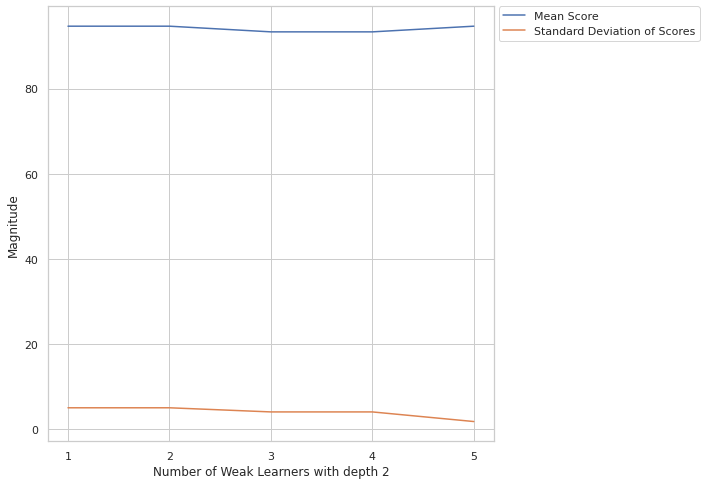

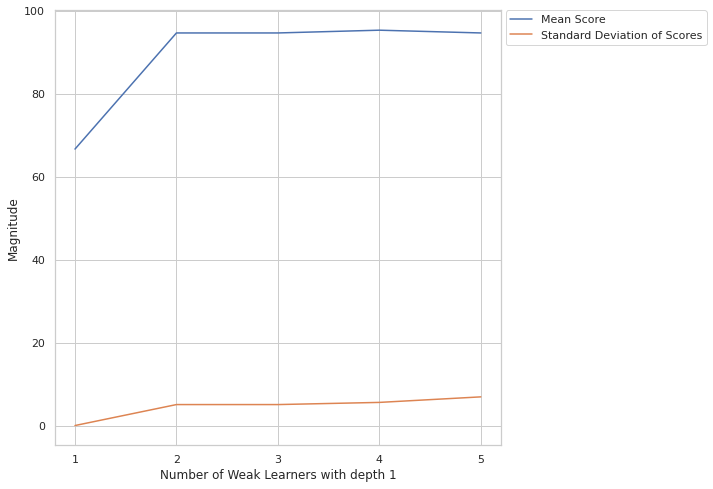

In [21]:
for i in range(2):
  plt.figure(figsize=(8,8))
  if i==0:
    plt.plot([1,2,3,4,5],means[0:5],label='Mean Score')
    plt.plot([1,2,3,4,5],stdevs[0:5],label='Standard Deviation of Scores')
    plt.xlabel("Number of Weak Learners with depth 2")
  else:
    plt.plot([1,2,3,4,5],means[5:10],label='Mean Score')
    plt.plot([1,2,3,4,5],stdevs[5:10],label='Standard Deviation of Scores')
    plt.xlabel("Number of Weak Learners with depth 1")
  plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
  plt.xticks([1,2,3,4,5])
  plt.ylabel("Magnitude")
  plt.show()
  print('\n')

#Bayes Classfication

# New Section

In [22]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB(binarize=0.6)
cnb = ComplementNB()
models = [mnb, gnb, bnb, cnb]
models_name=['Multinomial Naive Bayes Model', 'Gaussian Naive Bayes Model','Bernoulli Naive Bayes Model','Complement Naive Bayes']

Import modules

Naive Bayes algorithm using 5-fold cross validation 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41, shuffle=True)
for i in range(4):
  models[i].fit(X_train,Y_train)
  cvs = cross_val_score(models[i],X_train,Y_train, cv=5)
  pred=models[i].predict(X_test)
  score=accuracy_score(Y_test,pred)
  cm = confusion_matrix(Y_test, pred)
  print("Cross-validation scores for the", models_name[i], cvs)
  print("Mean accuracy: %5f"%(mean(cvs)*100) +' %')
  print("Accuracy Score: ",score,'')
  print("Confusion Matrix For", models_name[i] +":")
  print(cm,'\n')


Cross-validation scores for the Multinomial Naive Bayes Model [0.95833333 0.91666667 0.95833333 1.         0.91666667]
Mean accuracy: 95.000000 %
Accuracy Score:  0.9666666666666667 
Confusion Matrix For Multinomial Naive Bayes Model:
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]] 

Cross-validation scores for the Gaussian Naive Bayes Model [0.91666667 1.         0.95833333 1.         1.        ]
Mean accuracy: 97.500000 %
Accuracy Score:  0.9333333333333333 
Confusion Matrix For Gaussian Naive Bayes Model:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  2  8]] 

Cross-validation scores for the Bernoulli Naive Bayes Model [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
Mean accuracy: 66.666667 %
Accuracy Score:  0.6333333333333333 
Confusion Matrix For Bernoulli Naive Bayes Model:
[[ 9  0  0]
 [ 0  0 11]
 [ 0  0 10]] 

Cross-validation scores for the Complement Naive Bayes [0.66666667 0.66666667 0.66666667 0.66666667 0.70833333]
Mean accuracy: 67.500000 %
Accuracy Score:  0.6333333333333333 
Confusion Ma

Plot the ROC AUC curve

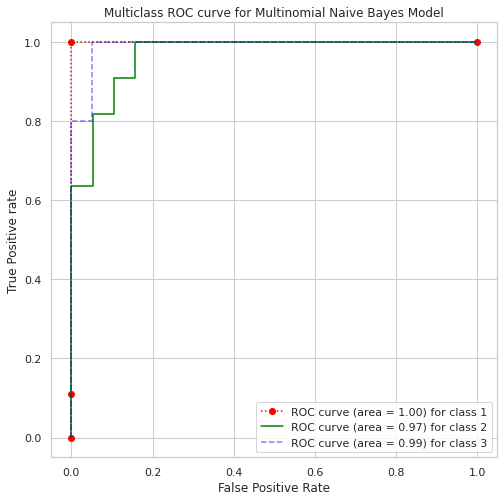

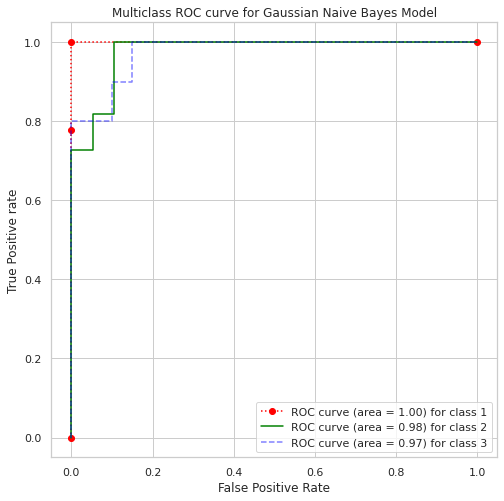

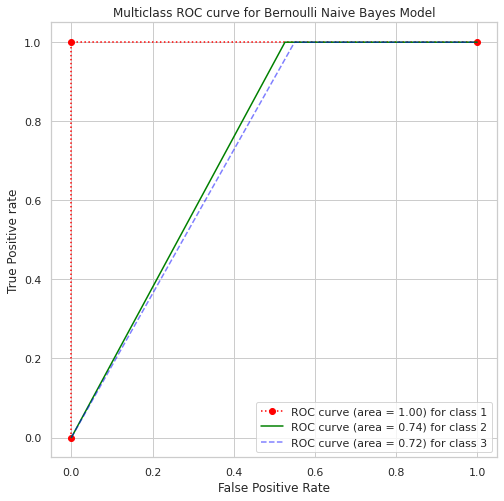

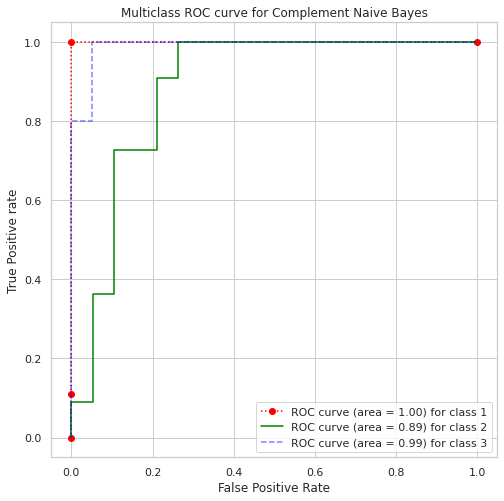

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41, shuffle=True)
# fit model
for i in range(len(models)):
  models[i].fit(X_train, Y_train)
  pred = models[i].predict(X_test)
  pred_prob = models[i].predict_proba(X_test)
  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}
  roc_auc={}
  n_class = 3
  for j in range(n_class):    
      fpr[j], tpr[j], thresh[j] = roc_curve(Y_test, pred_prob[:,j], pos_label=j)
      roc_auc[j] = auc(fpr[j], tpr[j])
  # plotting   
  plt.plot(fpr[0], tpr[0], linestyle=':', marker='o',color='red', label='ROC curve (area = %0.2f) for class %d' % (roc_auc[0], 1))
  plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='ROC curve (area = %0.2f) for class %d' % (roc_auc[1], 2))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC curve (area = %0.2f) for class %d' % (roc_auc[2], 3), alpha=0.5)
  plt.title('Multiclass ROC curve for %s'%models_name[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.show()
  print("\n")

Use logarithmic discriminant function to compute accuracy

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)
print("Accuracy from Logarithmic Discriminant Fucntion:", accuracy_score(Y_test, predictions))

Accuracy from Logarithmic Discriminant Fucntion: 0.9333333333333333


Bayes risk

In [26]:


p =gnb.predict_proba(X)
#risk of each feature : r1 , r2 , r3
r1 = 0
r2 = 0
r3 = 0
size = len(p)
for i in range(size):
  weight1 = p[i][0]
  weight2 = p[i][1]
  weight3 = p[i][2]
  a1 = 1*weight1 + 2*weight2 + 3*weight3
  a2 = 4*weight1 + 5*weight2 + 6*weight3
  a3 = 7*weight1 + 8*weight2 + 9*weight3
  r1 = r1 + a1
  r2 = r2 + a2
  r3 = r3 + a3
print("Classwise risk : ",r1,"," , r2 , ",",r3)
print("Classwise average risk per sample : ",r1/size,"," , r2/size , ",",r3/size)
print("Total risk : ",r1+r2+r3)
print("total average risk: ",r1/size+r2/size+r3/size)

Classwise risk :  299.64464336622757 , 749.6446433662277 , 1199.6446433662277
Classwise average risk per sample :  1.9976309557748504 , 4.997630955774851 , 7.997630955774851
Total risk :  2248.933930098683
total average risk:  14.992892867324553


[Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Adaboost Explaination](https://https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)

[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[Naive Bayes](https://https://scikit-learn.org/stable/modules/naive_bayes.html)


[Discriminant function analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)





